In [ ]:
'''
CAM을 얻기 위한 기본모델의 구성과 학습이 정상 진행되었는가?

ResNet50 + GAP + DenseLayer 결합된 CAM 모델의 학습과정이 안정적으로 수렴하였다.

분류근거를 설명 가능한 Class activation map을 얻을 수 있는가?

CAM 방식과 Grad-CAM 방식의 class activation map이 정상적으로 얻어지며, 시각화하였을 때 해당 object의 주요 특징 위치를 잘 반영한다.

인식결과의 시각화 및 성능 분석을 적절히 수행하였는가?

CAM과 Grad-CAM 각각에 대해 원본이미지합성, 바운딩박스, IoU 계산 과정을 통해 CAM과 Grad-CAM의 object localization 성능이 비교분석되었다.


'''

## ResNet50 + GAP + DenseLayer 결합된 CAM 모델의 학습과정이 안정적으로 수렴하였다.

# ResNet50 + GAP 모델 학습 결과 (Training Summary)

| Epoch | Train Loss | Train Acc (%) | Validation Loss | Validation Acc (%) | 비고 |
|-------|------------|----------------|------------------|----------------------|------|
| 1  | 1.6706 | 58.47% | 1.4665 | 59.13% |  |
| 2  | 0.6905 | 79.00% | 1.1826 | 65.42% |  |
| 3  | 0.3874 | 87.99% | 1.1501 | 67.44% |  |
| 4  | 0.2175 | 93.60% | 1.0516 | 70.93% |  |
| 5  | 0.0985 | 97.40% | 1.0308 | 71.43% |  |
| 6  | 0.0515 | 98.99% | 0.8416 | 77.13% |  |
| 7  | 0.0228 | 99.60% | 0.7959 | 78.17% |  |
| 8  | 0.0137 | 99.72% | 0.7509 | 79.45% |  |
| 9  | 0.0099 | 99.77% | 0.7171 | 80.72% | **Best Val Loss** |
| 10 | 0.0083 | 99.78% | 0.7185 | 80.57% |  |
| 11 | 0.0070 | 99.77% | 0.7182 | 80.83% |  |
| 12 | 0.0062 | 99.78% | 0.7216 | 80.93% |  |
| 13 | 0.0058 | 99.77% | 0.7236 | 80.94% | **Best Val Acc** |
| 14 | 0.0053 | 99.81% | 0.7286 | 80.54% |  |


## 학습과정이 안정적으로 수렴
![training_history](pics/training_history.png)


## GAP + DenseLayer
![is_gap](pics/is_gap.png)


## CAM 방식과 Grad-CAM 방식의 class activation map이 정상적으로 얻어지며, 시각화하였을 때 해당 object의 주요 특징 위치를 잘 반영한다.

**시각화 함수를 CAM, Grad-CAM에 대해 동일하게 사용하였기 때문에 그림의 이름이 모두 같습니다**

## 1. Layer4 Feature Map
![feature_map_layer4](pics/cam_77512.png)

---

## 2. CAM 결과
![cam_result](pics/cam_result.png)

---

## 3. Grad-CAM Layer별 활성화

### Layer 1
![layer1](pics/layer1.png)

### Layer 2
![layer2](pics/layer2.png)

### Layer 3
![layer3](pics/layer3.png)

### Layer 4
![layer4](pics/layer4.png)

---

## 4. CAM vs Grad-CAM Bounding Box 비교

### CAM Bounding Box
![CAM_bbox](pics/1.png)

### Grad-CAM Bounding Box
![GradCAM_bbox](pics/2.png)


## CAM vs Grad-CAM Object Localization 성능 비교 보고서

1. 실험 개요

ResNet50 + GAP + Dense Layer 구조로 구성한 CAM(Class Activation Mapping) 모델과 **Gradient-based Class Activation Mapping(Grad-CAM)**의 object localization 성능을 비교하였다.

이 비교는 다음을 목표로 한다.

두 방식이 어떻게 다른 설명을 제공하는지 분석

실제 이미지 내 object localization 성능을 정량적으로 비교

이론적 구조 특성(ResNet50 + GAP)으로 인해 CAM과 Grad-CAM이 비슷해지는 이유를 확인

여러 레이어(layer1~layer4)에 대해 Grad-CAM 성능 변화 관찰

---

2. 모델 구조

본 실험에서 사용한 CAM 모델 구조는 다음과 같다.

Backbone: ResNet50 (ImageNet pretrained)

Flatten 제거, FC 이전까지 특성 추출

GAP(Global Average Pooling) 적용

마지막 Linear 레이어는 클래스 수에 맞게 재구성

**CAM과 Grad-CAM이 layer4에서 수학적으로 거의 동일해지는 이유를 후술한다.**

---

3. 실험 데이터

Dataset: Stanford Dogs Dataset

GT(ground truth) bounding box 제공

Train/Test split 이후 CAM/Grad-CAM 비교는 test 또는 validation 이미지로 수행


---
4. 실험 방법

4.1 Heatmap 생성 방식

| Method       | 설명                                         |
| ------------ | ------------------------------------------ |
| **CAM**      | GAP 이전 feature map + FC weight 가중 합으로 생성   |
| **Grad-CAM** | 특정 레이어의 gradient 기반 채널 importance 계산 후 가중합 |


Grad-CAM은 아래 4개의 레이어에 대해 수행하였다.

Grad-CAM@layer1

Grad-CAM@layer2

Grad-CAM@layer3

Grad-CAM@layer4 (마지막 conv)


5. 정량적 성능 평가 (Quantitative Evaluation)

다음 표는 CAM과 Grad-CAM을 이용해 추정한 바운딩 박스(pred bbox)와  
정답 박스(gt bbox) 사이의 평균 IoU(mIoU)를 비교한 결과이다.

| Method              | mIoU |
| ------------------- | --------------------- |
| **CAM**             | **0.4694** |
| **Grad-CAM@layer1** | **0.5519** |
| **Grad-CAM@layer2** | **0.5623** |
| **Grad-CAM@layer3** | **0.5366** |
| **Grad-CAM@layer4** | **0.4694** |

### 해석

- **CAM과 Grad-CAM@layer4 의 mIoU가 동일(0.4694)**  
  → GAP 기반 구조 특성상 layer4(=conv5_x 출력)은 CAM과 Grad-CAM이  
    이론적으로 거의 동일한 heatmap을 생성하기 때문임.

- **Grad-CAM이 더 얕은(shallow) 레이어(layer1–layer3)를 대상으로 할 때 mIoU가 상승**  
  → 저층 레이어의 feature map은 더 높은 spatial resolution을 가지므로  
    객체 위치 정보를 더 잘 보존함.  
  → 특히 **Grad-CAM@layer2가 최고 성능(0.5623)** 을 보임.

- **Interpretation:**  
  객체 분류를 위해 훈련된 ResNet50은 깊은 레이어(layer4)에서  
  semantic 정보만 남고 공간 해상도가 크게 줄어들기 때문에  
  object localization 성능이 제한됨.  
  반면 shallow/mid layer를 사용한 Grad-CAM은 localization에 유리함.


---

### 1. 왜 결과가 같은가

### GAP 기반 구조에서 CAM과 Grad-CAM이 이론적으로 비슷한 이유

ResNet50 + GAP + DenseLayer 구조에서,  
클래스 $c$ 에 대한 모델의 출력 점수 $y^c$ 는 다음과 같다.

$$
y^c = \sum_k w_k^c \cdot \frac{1}{Z}\sum_{i,j} A_k(i,j)
$$

여기서  
- $A_k(i,j)$ : 마지막 convolution feature map의 $k$번째 채널  
- $w_k^c$ : FC layer의 클래스 $c$에 대한 weight  
- $Z = H \times W$

Grad-CAM은 score $y^c$ 를 feature map에 대해 미분하여 얻는다.

$$
\frac{\partial y^c}{\partial A_k(i,j)}
= \frac{1}{Z} w_k^c
$$

Grad-CAM은 각 채널의 중요도를 spatial average pooling하여

$$
\alpha_k^c
= \frac{1}{Z} \sum_{i,j}
\frac{\partial y^c}{\partial A_k(i,j)}
$$

이를 위 식에 대입하면

$$
\alpha_k^c
= \frac{1}{Z} \sum_{i,j} \frac{1}{Z} w_k^c
\propto w_k^c
$$

즉, Grad-CAM의 채널 weight $\alpha_k^c$ 는  
FC weight $w_k^c$ 와 **정비례 관계**를 가진다.

따라서 Grad-CAM은 다음과 같이 CAM과 동일한 형태가 된다.

$$
L_{\text{Grad-CAM}}^c(i,j)
= \mathrm{ReLU}\left( \sum_k \alpha_k^c A_k(i,j) \right)
\propto
\mathrm{ReLU}\left( \sum_k w_k^c A_k(i,j) \right)
= \text{CAM}^c(i,j)
$$

즉,

$$
\text{Grad-CAM}(i,j) \approx \text{CAM}(i,j)
$$


따라서 GAP 기반 구조에서는 마지막 레이어(layer4)에 대해  
CAM과 Grad-CAM이 **수학적으로 거의 동일한 heatmap을 생성하는 것이 정상**



따라서 Grad-CAM의 채널 weight:

→ 마지막 레이어(layer4)에서는 두 heatmap이 거의 동일한 형태로 나타나는 것이 이론적으로 정상임을 확인하였다.

7.2 중간 레이어(layer1~layer3)에서는 차이가 발생

layer1: edge/texture 기반, 노이즈가 많고 GT와 멀어진 bbox

layer2: 좀 더 넓은 영역 커버

layer3: object 전체를 더 잘 포착하는 경향

layer4: CAM과 매우 유사, object의 가장 판별적인 위치만 강조

---

분류 모델은 객체 전체를 보는 대신 **가장 판별력이 높은 부분만** 집중하는 경향이 있다.  
즉, 모델은 **"가장 쉽게 정답을 맞출 수 있는 최소 영역(Discriminative Region)"**만 활성화하기 때문에  
꼬리, 다리, 몸통을 전부 볼 필요 없이 **강아지 얼굴만 보고 "강아지"라고 판단**해버린다.

이 현상은 다음과 같은 이유로 발생한다.

- layer4는 spatial 해상도가 매우 낮아짐 (예: 7×7)
- 분류 모델은 global feature만 남기고 위치 정보는 대부분 버림
- GAP(Global Average Pooling)이 공간 정보를 마지막으로 압축함
- 따라서 activation이 **전체 객체가 아니라 얼굴·눈·귀 같은 판별 부위에 집중됨**

이는 Weakly Supervised Object Localization(WSOL) 연구 분야의 핵심 문제이기도 하며,  
DropBlock, hide-and-seek, CutMix regularization 등이 등장.

## 회고

당연히 결과가 다를 줄 알았는데 결과가 같아서 왜 같은지 찾아보고
보고서 작성에 시간을 많이 할애 한 것 같습니다.

시간이 좀 더 있었으면 사진이 아니라, 영상으로 시도해보면 좋을 것 같습니다.

In [71]:
import torch
import numpy as np
import cv2
import PIL



### Trouble shooting

## Windows의 멀티프로세싱 방식

- Linux/Mac: fork
- Windows: spawn 방식

## 문제점 
- 데이터셋 생성, 모델 로드, train_model 호출이 global 변수
- num_workers=2 로 설정하면 deadlock 발생으로 학습진행 x

## 저번 프로젝트에서는 문제 없었는데 왜 deadlock이 걸리는지 모르겠음.

## solve

- num_workers = 0 
- if __name__ == '__main__': 

**둘 중 하나 선택**


In [5]:
import os
import shutil
import scipy.io as sio

# 원본 데이터 경로 (절대 경로) LMS에서 실행하면 화면이 검은색으로 변하는 
# 문제 발생으로 로컬실행을 위해 코드 일부 변경
base_path = r'C:\Users\C\Desktop\cam\archive'
images_dir = os.path.join(base_path, 'images', 'Images')  # 이미지들이 위치한 폴더
lists_dir = os.path.join(base_path, 'lists')  # .mat 파일들이 위치한 폴더

# .mat 파일 경로
train_mat_path = os.path.join(lists_dir, 'train_list.mat')
test_mat_path = os.path.join(lists_dir, 'test_list.mat')

# .mat 파일 로드
train_mat = sio.loadmat(train_mat_path)
test_mat = sio.loadmat(test_mat_path)

# train_mat와 test_mat 내부에 'file_list'와 'labels' 등이 있음
train_file_list = train_mat['file_list']
train_labels = train_mat['labels'].squeeze()  # (N,)
test_file_list = test_mat['file_list']
test_labels = test_mat['labels'].squeeze()

# 최종적으로 ImageFolder 구조로 재구성할 대상 폴더 생성
output_base_dir = os.path.join(base_path, 'stanford_dogs')
train_dir = os.path.join(output_base_dir, 'train')
test_dir = os.path.join(output_base_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def process_mat_file(file_list_array, split_dir):
    """
    .mat 파일에서 로드한 file_list_array를 사용해,
    split_dir(예: train 혹은 test)에 클래스별 폴더를 생성하고 이미지를 복사합니다.
    """
    num_files = file_list_array.shape[0]
    copied = 0
    skipped = 0
    
    for idx in range(num_files):
        
        # file_list_array[idx]는 보통 array([<파일경로>]) 형태입니다.
        # 따라서, array([<파일경로>]).item()을 사용하면 실제 문자열을 얻을 수 있습니다.
        file_path = file_list_array[idx][0].item()
        
        # 혹시 bytes 타입이면 문자열로 디코딩
        if isinstance(file_path, bytes):
            file_path = file_path.decode('utf-8')
        
        # 파일 경로 예시: 'n02116738-African_hunting_dog/n02116738_2988.jpg'
        # 클래스 이름은 파일 경로의 최상위 폴더명 (예: 'n02116738-African_hunting_dog')
        class_folder = file_path.split('/')[0]
        
        # 대상 클래스 폴더 생성
        dest_folder = os.path.join(split_dir, class_folder)
        os.makedirs(dest_folder, exist_ok=True)
        
        # 원본 이미지 경로: Images 폴더 아래에 file_path 위치
        src_path = os.path.join(images_dir, file_path.replace('/', os.sep))
        
        # 대상 이미지 경로: dest_folder 아래에 원본 파일명 그대로 복사
        dest_path = os.path.join(dest_folder, os.path.basename(file_path))
        
        # 파일 존재 여부 확인
        # 실행 버튼 많이 눌러도 다시 복사안하게 같은 이름의 파일이 있으면 복사 안하고 넘어갑니다.
        # / 이던 \ 이던 상관없음
        if os.path.exists(src_path):
            # 대상 파일이 이미 존재하면 건너뛰기 (선택적)
            if os.path.exists(dest_path):
                skipped += 1
            else:
                shutil.copy(src_path, dest_path)
                copied += 1
        else:
            print(f"File not found: {src_path}")
    
    print(f"  → Copied: {copied}, Skipped: {skipped}, Total: {num_files}")

print("Processing train set...")
process_mat_file(train_file_list, train_dir)

print("Processing test set...")
process_mat_file(test_file_list, test_dir)

print("\nDataset reorganization complete.")
print(f"Train directory: {os.path.normpath(train_dir)}")
print(f"Test directory: {os.path.normpath(test_dir)}")





Processing train set...
  → Copied: 0, Skipped: 12000, Total: 12000
Processing test set...
  → Copied: 0, Skipped: 8580, Total: 8580

Dataset reorganization complete.
Train directory: C:\Users\C\Desktop\cam\archive\stanford_dogs\train
Test directory: C:\Users\C\Desktop\cam\archive\stanford_dogs\test


In [6]:
import xml.etree.ElementTree as ET
from torchvision import datasets

class StanfordDogsDatasetWithBBox(datasets.ImageFolder):
    def __init__(self, root, annotation_root, transform=None):
        super().__init__(root, transform=transform)
        self.annotation_root = annotation_root  # 예: 'C:\\Users\\C\\Desktop\\cam\\archive\\annotations\\Annotation'
        self.new_size = (224, 224)
    
    def __getitem__(self, index):
        image, label = super().__getitem__(index)
        path, _ = self.samples[index]
        
        # 상대 경로 계산
        rel_path = os.path.relpath(path, self.root)
        annot_filename = os.path.splitext(os.path.basename(rel_path))[0]
        annot_folder = os.path.basename(os.path.dirname(rel_path))
        annot_path = os.path.join(self.annotation_root, annot_folder, annot_filename)
        
        # bbox 기본값 (예: [xmin, ymin, xmax, ymax])
        bbox = [0.0, 0.0, 224.0, 224.0]
        
        # Annotation 파일 읽기 시도 (에러가 나도 진행)
        try:
            if os.path.exists(annot_path):
                tree = ET.parse(annot_path)
                root_xml = tree.getroot()
                
                # 첫 번째 object 태그에서 bndbox 정보를 읽음
                obj = root_xml.find('object')
                if obj is not None:
                    bndbox = obj.find('bndbox')
                    if bndbox is not None:
                        xmin = float(bndbox.find('xmin').text)
                        ymin = float(bndbox.find('ymin').text)
                        xmax = float(bndbox.find('xmax').text)
                        ymax = float(bndbox.find('ymax').text)
                        
                        # XML 내 <size> 태그에서 원본 이미지 크기 획득
                        size = root_xml.find('size')
                        if size is not None:
                            w = float(size.find('width').text)
                            h = float(size.find('height').text)
                            
                            new_h, new_w = self.new_size
                            # bbox 좌표 순서: [xmin, ymin, xmax, ymax]
                            bbox = [xmin * (new_w / w), ymin * (new_h / h),
                                    xmax * (new_w / w), ymax * (new_h / h)]
        except Exception as e:
            # 에러가 나도 기본 bbox로 계속 진행
            pass
        
        return image, label, bbox
    
# 훈련부분의 DEADLOCK으로 디버깅 위해 코드수정을 했습니다.

In [7]:
# ========== DataLoader 설정 ==========
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 경로 (재구성한 ImageFolder 형식)
train_dataset_dir = os.path.join(output_base_dir, 'train')
test_dataset_dir = os.path.join(output_base_dir, 'test')

# Annotation 폴더 경로
annotation_dir = os.path.join(base_path, 'annotations', 'Annotation')

# 커스텀 데이터셋 생성: image, label, bbox 반환
train_dataset = StanfordDogsDatasetWithBBox(
    root=train_dataset_dir, 
    annotation_root=annotation_dir, 
    transform=transform
)
valid_dataset = StanfordDogsDatasetWithBBox(
    root=test_dataset_dir, 
    annotation_root=annotation_dir, 
    transform=transform
)


# ========== Annotation XML 파일 확인 ==========
print(f"\n========== Sample Annotation XML ==========")

# Annotation 폴더에서 샘플 데이터 확인
sample_annotation_path = os.path.join(
    base_path, 
    'annotations', 
    'Annotation', 
    'n02085620-Chihuahua', 
    'n02085620_10074'
)

# XML 파일 파싱
if os.path.exists(sample_annotation_path):
    tree = ET.parse(sample_annotation_path)
    root_xml = tree.getroot()
    
    print(f"Annotation file: {sample_annotation_path}")
    print("\nXML Structure:")
    for elem in root_xml.iter():
        if elem.text and elem.text.strip():
            print(f"{elem.tag}: {elem.text}")
else:
    print(f"Annotation file not found: {sample_annotation_path}")


========== Sample Annotation XML ==========
Annotation file: C:\Users\C\Desktop\cam\archive\annotations\Annotation\n02085620-Chihuahua\n02085620_10074

XML Structure:
folder: 02085620
filename: n02085620_10074
database: ImageNet database
width: 333
height: 500
depth: 3
segment: 0
name: Chihuahua
pose: Unspecified
truncated: 0
difficult: 0
xmin: 25
ymin: 10
xmax: 276
ymax: 498


In [ ]:
# 모델 / PARAMS / HYPER PARAMS
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision.models import ResNet50_Weights

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n========== 이제시작 ==========")
print(f"어디: {device}")

# ResNet50 + GAP 
class ResNet50_CAM(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50_CAM, self).__init__()
        
        # ResNet50 백본 로드 (사전학습된 가중치 사용)
        resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        
        # 마지막 FC layer와 avgpool 제거
        self.features = nn.Sequential(*list(resnet.children())[:-2])
        
        # GAP (Global Average Pooling)
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        
        # Dense Layer (FC)
        self.fc = nn.Linear(2048, num_classes)  # ResNet50의 마지막 feature는 2048 채널
        
    def forward(self, x):
        # Feature extraction
        features = self.features(x)  # [batch, 2048, 7, 7]
        
        # Global Average Pooling
        gap_features = self.gap(features)  # [batch, 2048, 1, 1]
        gap_features = gap_features.view(gap_features.size(0), -1)  # [batch, 2048]
        
        # Classification
        output = self.fc(gap_features)  # [batch, num_classes]
        
        return output
    
    def get_cam_weights(self):
        """CAM 생성을 위한 FC layer 가중치 반환"""
        return self.fc.weight.data  # [num_classes, 2048]
    
    def get_features(self, x):
        """CAM 생성을 위한 feature map 반환"""
        return self.features(x)  # [batch, 2048, 7, 7]
'''
gap + dense 라고해서 급하게 다시 정의한 것인데
생각해보니 노드 코드도 비슷했던것 같습니다.

다만. FC layer, feature map 반환하는 코드를 추가하였습니다.

'''


# 모델 생성
num_classes = len(train_dataset.classes)
model = ResNet50_CAM(num_classes=num_classes)
model = model.to(device)


# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


# 데이터로더 
# 병목인줄 알았지? deadlock이다 캬캬캬

batch_size = 64  # 배치 크기 증가 (GPU 메모리에 맞게 조정: 32 -> 64)
num_workers = 0  # Windows에서는 0으로 시작 (문제 해결 후 증가)

train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True, 
    num_workers=num_workers,
    pin_memory=True  # GPU 전송 속도 향상
)

valid_loader = DataLoader(
    valid_dataset, 
    batch_size=batch_size, 
    shuffle=False, 
    num_workers=num_workers,
    pin_memory=True
)

num_classes = len(train_dataset.classes)
print(f"클래스: {num_classes}")
print(f"샘플: {len(train_dataset)}")
print(f"테스트 샘플: {len(valid_dataset)}")
print(f"배치사이즈: {batch_size}")
# print(f"Num workers: {num_workers}")
print(f"Train batches: {len(train_loader)}")
print(f"Test batches: {len(valid_loader)}")

# ========== TQDM 추가(디버깅) ==========

from tqdm import tqdm

def train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=13):
    # 학습 기록 저장
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    for epoch in range(num_epochs):
        print(f"\n{'='*60}")
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"{'='*60}")
        
        # ========== Training Phase ==========
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        # Progress bar for training
        train_pbar = tqdm(train_loader, desc=f"Training", 
                         bar_format='{l_bar}{bar:30}{r_bar}{bar:-10b}',
                         ncols=100)
        
        for batch_idx, (images, labels, _) in enumerate(train_pbar):
            images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()
            
            # Update progress bar
            current_loss = running_loss / (batch_idx + 1)
            current_acc = 100 * correct / total
            train_pbar.set_postfix({
                'Loss': f'{current_loss:.4f}',
                'Acc': f'{current_acc:.2f}%'
            })

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        print(f"\n✓ Train Results - Loss: {train_loss:.4f}, Accuracy: {train_acc*100:.2f}%")
        
        # 기록 저장
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)

        # ========== Validation Phase ==========
        model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        
        # Progress bar for validation
        valid_pbar = tqdm(valid_loader, desc=f"Validation", 
                         bar_format='{l_bar}{bar:30}{r_bar}{bar:-10b}',
                         ncols=100)
        
        with torch.no_grad():
            for batch_idx, (images, labels, _) in enumerate(valid_pbar):
                images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (preds == labels).sum().item()
                
                # Update progress bar
                current_loss = running_loss / (batch_idx + 1)
                current_acc = 100 * correct / total
                valid_pbar.set_postfix({
                    'Loss': f'{current_loss:.4f}',
                    'Acc': f'{current_acc:.2f}%'
                })

        test_loss = running_loss / len(valid_loader)
        test_acc = correct / total
        print(f"✓ Validation Results - Loss: {test_loss:.4f}, Accuracy: {test_acc*100:.2f}%")
        
        # 기록 저장
        history['val_loss'].append(test_loss)
        history['val_acc'].append(test_acc)
    
    return history

print(model)



========== 이제시작 ==========
어디: cuda
클래스: 120
샘플: 12000
테스트 샘플: 8580
배치사이즈: 64
Train batches: 188
Test batches: 135
ResNet50_CAM(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True,


Epoch 1/14


Training: 100%|██████████████████████████████| 188/188 [00:48<00:00,  3.90it/s, Loss=1.6706, Acc=58.



✓ Train Results - Loss: 1.6706, Accuracy: 58.47%


Validation: 100%|██████████████████████████████| 135/135 [00:22<00:00,  6.08it/s, Loss=1.4665, Acc=5


✓ Validation Results - Loss: 1.4665, Accuracy: 59.13%

Epoch 2/14


Training: 100%|██████████████████████████████| 188/188 [00:46<00:00,  4.07it/s, Loss=0.6905, Acc=79.



✓ Train Results - Loss: 0.6905, Accuracy: 79.00%


Validation: 100%|██████████████████████████████| 135/135 [00:21<00:00,  6.38it/s, Loss=1.1826, Acc=6


✓ Validation Results - Loss: 1.1826, Accuracy: 65.42%

Epoch 3/14


Training: 100%|██████████████████████████████| 188/188 [00:45<00:00,  4.09it/s, Loss=0.3874, Acc=87.



✓ Train Results - Loss: 0.3874, Accuracy: 87.99%


Validation: 100%|██████████████████████████████| 135/135 [00:21<00:00,  6.40it/s, Loss=1.1501, Acc=6


✓ Validation Results - Loss: 1.1501, Accuracy: 67.44%

Epoch 4/14


Training: 100%|██████████████████████████████| 188/188 [00:46<00:00,  4.02it/s, Loss=0.2175, Acc=93.



✓ Train Results - Loss: 0.2175, Accuracy: 93.60%


Validation: 100%|██████████████████████████████| 135/135 [00:21<00:00,  6.19it/s, Loss=1.0516, Acc=7


✓ Validation Results - Loss: 1.0516, Accuracy: 70.93%

Epoch 5/14


Training: 100%|██████████████████████████████| 188/188 [00:49<00:00,  3.78it/s, Loss=0.0985, Acc=97.



✓ Train Results - Loss: 0.0985, Accuracy: 97.40%


Validation: 100%|██████████████████████████████| 135/135 [00:23<00:00,  5.64it/s, Loss=1.0308, Acc=7


✓ Validation Results - Loss: 1.0308, Accuracy: 71.43%

Epoch 6/14


Training: 100%|██████████████████████████████| 188/188 [00:53<00:00,  3.51it/s, Loss=0.0515, Acc=98.



✓ Train Results - Loss: 0.0515, Accuracy: 98.99%


Validation: 100%|██████████████████████████████| 135/135 [00:23<00:00,  5.82it/s, Loss=0.8416, Acc=7


✓ Validation Results - Loss: 0.8416, Accuracy: 77.13%

Epoch 7/14


Training: 100%|██████████████████████████████| 188/188 [00:50<00:00,  3.74it/s, Loss=0.0228, Acc=99.



✓ Train Results - Loss: 0.0228, Accuracy: 99.60%


Validation: 100%|██████████████████████████████| 135/135 [00:23<00:00,  5.74it/s, Loss=0.7959, Acc=7


✓ Validation Results - Loss: 0.7959, Accuracy: 78.17%

Epoch 8/14


Training: 100%|██████████████████████████████| 188/188 [00:51<00:00,  3.65it/s, Loss=0.0137, Acc=99.



✓ Train Results - Loss: 0.0137, Accuracy: 99.72%


Validation: 100%|██████████████████████████████| 135/135 [00:23<00:00,  5.83it/s, Loss=0.7509, Acc=7


✓ Validation Results - Loss: 0.7509, Accuracy: 79.45%

Epoch 9/14


Training: 100%|██████████████████████████████| 188/188 [00:49<00:00,  3.77it/s, Loss=0.0099, Acc=99.



✓ Train Results - Loss: 0.0099, Accuracy: 99.77%


Validation: 100%|██████████████████████████████| 135/135 [00:22<00:00,  5.90it/s, Loss=0.7171, Acc=8


✓ Validation Results - Loss: 0.7171, Accuracy: 80.72%

Epoch 10/14


Training: 100%|██████████████████████████████| 188/188 [00:50<00:00,  3.70it/s, Loss=0.0083, Acc=99.



✓ Train Results - Loss: 0.0083, Accuracy: 99.78%


Validation: 100%|██████████████████████████████| 135/135 [00:23<00:00,  5.76it/s, Loss=0.7185, Acc=8


✓ Validation Results - Loss: 0.7185, Accuracy: 80.57%

Epoch 11/14


Training: 100%|██████████████████████████████| 188/188 [00:50<00:00,  3.76it/s, Loss=0.0070, Acc=99.



✓ Train Results - Loss: 0.0070, Accuracy: 99.77%


Validation: 100%|██████████████████████████████| 135/135 [00:24<00:00,  5.54it/s, Loss=0.7182, Acc=8


✓ Validation Results - Loss: 0.7182, Accuracy: 80.83%

Epoch 12/14


Training: 100%|██████████████████████████████| 188/188 [00:59<00:00,  3.16it/s, Loss=0.0062, Acc=99.



✓ Train Results - Loss: 0.0062, Accuracy: 99.78%


Validation: 100%|██████████████████████████████| 135/135 [00:25<00:00,  5.35it/s, Loss=0.7216, Acc=8


✓ Validation Results - Loss: 0.7216, Accuracy: 80.93%

Epoch 13/14


Training: 100%|██████████████████████████████| 188/188 [00:57<00:00,  3.28it/s, Loss=0.0058, Acc=99.



✓ Train Results - Loss: 0.0058, Accuracy: 99.77%


Validation: 100%|██████████████████████████████| 135/135 [00:26<00:00,  5.15it/s, Loss=0.7236, Acc=8


✓ Validation Results - Loss: 0.7236, Accuracy: 80.94%

Epoch 14/14


Training: 100%|██████████████████████████████| 188/188 [00:53<00:00,  3.54it/s, Loss=0.0053, Acc=99.



✓ Train Results - Loss: 0.0053, Accuracy: 99.81%


Validation: 100%|██████████████████████████████| 135/135 [00:25<00:00,  5.33it/s, Loss=0.7286, Acc=8


✓ Validation Results - Loss: 0.7286, Accuracy: 80.54%

총 학습 시간: 17분 20.4초

모델 저장 완료: C:\Users\C\Desktop\cam\archive\resnet50_stanford_dogs.pth
학습 그래프 저장 완료: C:\Users\C\Desktop\cam\archive\training_history.png


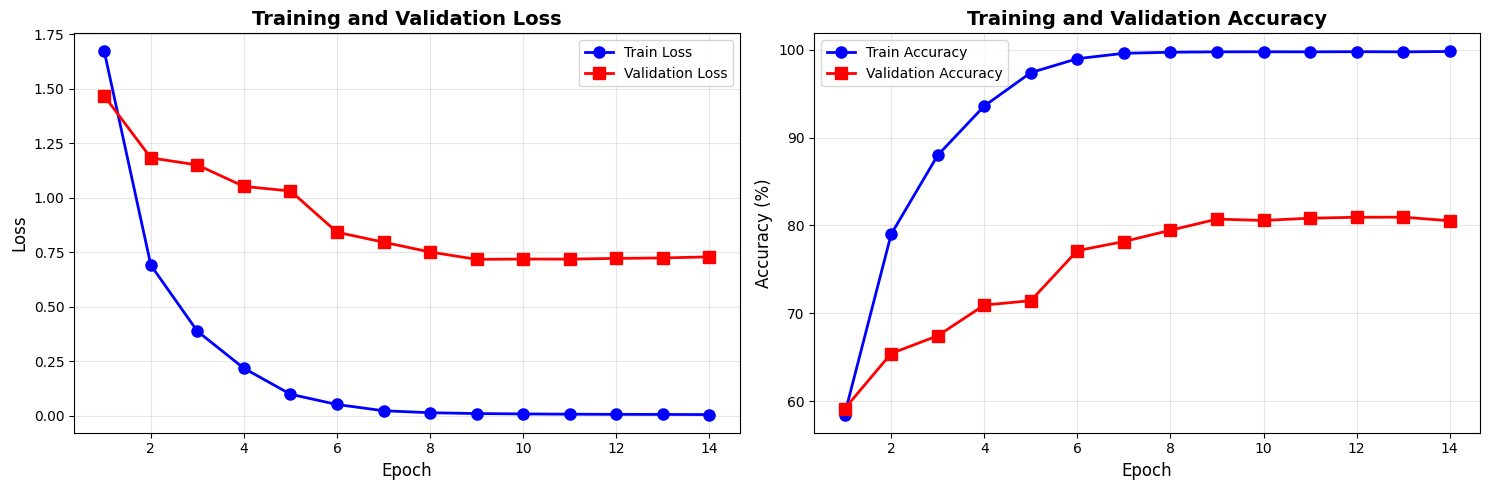

In [33]:
import time

if __name__ == '__main__':
    start_time = time.time()
    
    history = train_model(model, train_loader, valid_loader, criterion, optimizer, num_epochs=14)
    
    elapsed_time = time.time() - start_time
    print(f"\n총 학습 시간: {elapsed_time//60:.0f}분 {elapsed_time%60:.1f}초")
    
    # 모델 저장
    cam_model_path = os.path.join(base_path, 'resnet50_stanford_dogs.pth')
    torch.save(model, cam_model_path)
    print(f"\n모델 저장 완료: {cam_model_path}")
    
    # ========== 학습 결과 시각화 ==========
    import matplotlib.pyplot as plt
    
    epochs = range(1, len(history['train_loss']) + 1)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss 그래프
    axes[0].plot(epochs, history['train_loss'], 'b-o', label='Train Loss', linewidth=2, markersize=8)
    axes[0].plot(epochs, history['val_loss'], 'r-s', label='Validation Loss', linewidth=2, markersize=8)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Accuracy 그래프
    axes[1].plot(epochs, [acc*100 for acc in history['train_acc']], 'b-o', label='Train Accuracy', linewidth=2, markersize=8)
    axes[1].plot(epochs, [acc*100 for acc in history['val_acc']], 'r-s', label='Validation Accuracy', linewidth=2, markersize=8)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # 그래프 저장
    plot_path = os.path.join(base_path, 'training_history.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"학습 그래프 저장 완료: {plot_path}")
    plt.show()
    


In [120]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1) unnormalize 함수
def unnormalize(img_tensor):
    """
    img_tensor: [C, H, W] (ImageNet 정규화가 적용된 텐서)
    """
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])

    img = img_tensor.detach().cpu().numpy().transpose(1, 2, 0)  # [H,W,C]
    img = std * img + mean
    img = np.clip(img, 0, 1)
    img = (img * 255).astype(np.uint8)  # [0,255] uint8
    return img

# 2) CAM 단독 시각화
def visualize_cam(cam):
    plt.figure(figsize=(5,5))
    plt.imshow(cam, cmap='jet')
    plt.colorbar()
    plt.title("CAM")
    plt.axis('off')
    plt.show()

# 3) 원본 이미지 위 CAM overlay
def visualize_cam_on_image(cam, img, alpha=0.5):
    """
    cam: 2D numpy array (0~1 정규화된 CAM, ex: [Hc,Wc])
    img: 원본 RGB 이미지 (H,W,3), uint8
    """
    # CAM을 원본 크기에 맞게 리사이즈
    cam_resized = cv2.resize(cam, (img.shape[1], img.shape[0]))
    cam_resized = np.clip(cam_resized, 0, 1)

    heatmap = cv2.applyColorMap(np.uint8(255 * cam_resized), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    overlay = heatmap * alpha + img * (1 - alpha)
    overlay = overlay.astype(np.uint8)

    plt.figure(figsize=(5,5))
    plt.imshow(overlay)
    plt.title("Overlay on Image")
    plt.axis('off')
    plt.show()

In [95]:
def generate_cam(model, item):
    """
    model : ResNet50_CAM
    item  : (image, label, bbox) 형태 (train_dataset[i] 결과)
    return: CAM (0~1, numpy 2D)
    """
    model.eval()
    image = item[0]                        # [C,H,W] 텐서
    x = image.unsqueeze(0).to(device)      # [1,C,H,W]

    with torch.no_grad():
        features = model.get_features(x)                     # [1,2048,Hf,Wf]
        logits   = model.fc(model.gap(features).view(1, -1)) # [1,num_classes]

    pred_class = logits.argmax(dim=1).item()

    fc_weights = model.get_cam_weights()[pred_class].view(-1, 1, 1).to(device)  # [2048,1,1]
    fmap = features[0]  # [2048,Hf,Wf]

    cam = torch.sum(fc_weights * fmap, dim=0)  # [Hf,Wf]
    cam = cam.detach().cpu().numpy()

    cam = np.maximum(cam, 0)
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)

    return cam


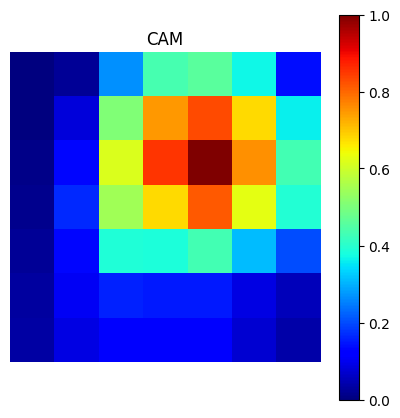

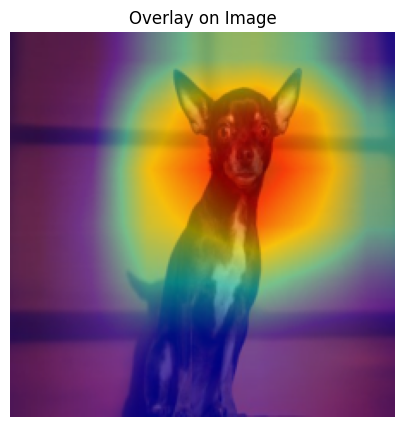

In [121]:
# 5) 모델 로드 (ResNet50_CAM 기준)
base_path = r"C:/Users/C/Desktop/cam/archive"
cam_model_path = os.path.join(base_path, 'resnet50_stanford_dogs.pth')

# torch.save(model, path) 로 저장했다면:
model = torch.load(
    cam_model_path,
    map_location=device,
    weights_only=False  # 중요
)
model = model.to(device)
model.eval()

# 6) 데이터셋에서 샘플 하나 가져오기 (image, label, bbox 구조라고 가정)
image, label, bbox = train_dataset[10]      # image: [C,H,W] (정규화 적용된 텐서)
sample_image = image.unsqueeze(0).to(device)  # [1,C,H,W]

# 7) CAM 생성
cam = generate_cam(model, sample_image)

# 8) 시각화
orig_img = unnormalize(image)  # [H,W,3], uint8

visualize_cam(cam)
visualize_cam_on_image(cam, orig_img)

In [112]:
def _get_activation_layer(model, activation_layer: str):
    mapping = {
        "layer1": model.features[4],
        "layer2": model.features[5],
        "layer3": model.features[6],
        "layer4": model.features[7],
    }
    if activation_layer not in mapping:
        raise ValueError(f"Unknown activation_layer: {activation_layer}")
    return mapping[activation_layer]



'''
모델을 재정의하면 필요없는 함수입니다.
훈련시간 20분 기다리기 싫어서 만들었습니다.
'''



'\n모델을 재정의하면 필요없는 함수입니다.\n훈련시간 20분 기다리기 싫어서 만들었습니다.\n'

In [118]:
def generate_grad_cam(model, activation_layer, item):
    model.eval()
    image = item[0]
    x = image.unsqueeze(0).to(device)
    """
    model: ResNet50_CAM
    activation_layer: 'layer1'|'layer2'|'layer3'|'layer4'
    item : (image, label, bbox)
    return: Grad-CAM (0~1, numpy 2D)
    """
    features = {}
    gradients = {}

    target_layer = _get_activation_layer(model, activation_layer)


    # 디버깅
    # print("target_layer:", target_layer) cam / grad cam iou 소수점 15자리까지 같게 나옴

    def forward_hook(module, inp, out):
        features["value"] = out

    def backward_hook(module, grad_in, grad_out):
        gradients["value"] = grad_out[0]

    f_handle = target_layer.register_forward_hook(forward_hook)
    b_handle = target_layer.register_full_backward_hook(backward_hook)

    output = model(x)
    pred_class = output.argmax(dim=1).item()

    model.zero_grad()
    score = output[0, pred_class]
    score.backward()

    f_handle.remove()
    b_handle.remove()

    fmap  = features["value"][0]      # GPU tensor [C,Hf,Wf]
    grads = gradients["value"][0]     # GPU tensor [C,Hf,Wf]

    # GPU에서 GAP 계산
    weights = torch.mean(grads, dim=(1, 2))  # GPU tensor [C]

    # grad_cam도 GPU에서 생성해야 함
    grad_cam = torch.zeros(fmap.shape[1:], dtype=torch.float32, device=fmap.device)

    for i, w in enumerate(weights):
        grad_cam += w * fmap[i]

    # CPU로 내린 후 numpy 변환
    grad_cam = grad_cam.detach().cpu().numpy()
    grad_cam = np.maximum(grad_cam, 0)
    grad_cam = (grad_cam - grad_cam.min()) / (grad_cam.max() - grad_cam.min() + 1e-8)

    return grad_cam


Grad-CAM @ layer1


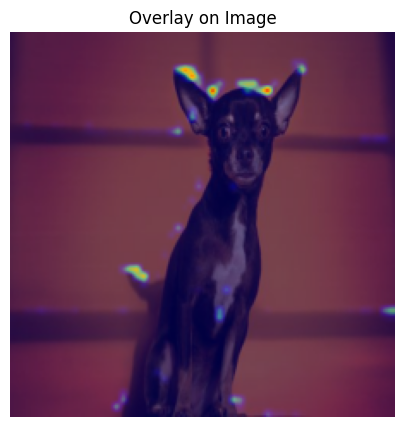

Grad-CAM @ layer2


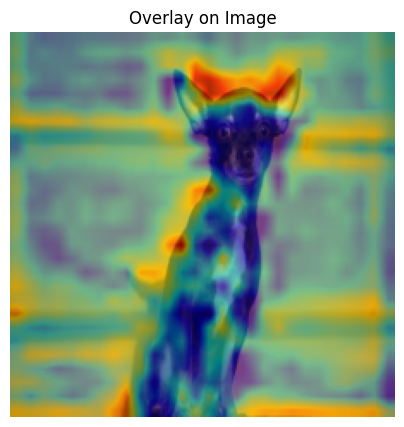

Grad-CAM @ layer3


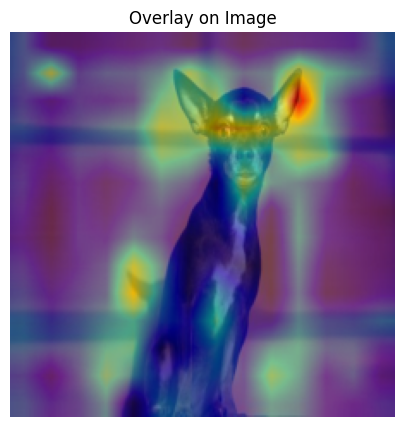

Grad-CAM @ layer4


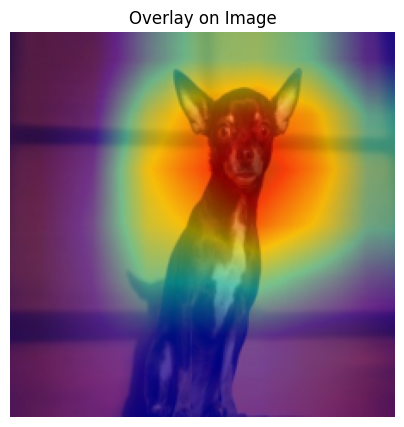

In [122]:
item = train_dataset[10]
orig_img = unnormalize(item[0])

for layer in ["layer1", "layer2", "layer3", "layer4"]:
    gcam = generate_grad_cam(model, layer, item)
    print(f"Grad-CAM @ {layer}")
    visualize_cam_on_image(gcam, orig_img, alpha=0.5)


In [123]:
def get_bbox(cam, threshold=0.5):
    """
    cam: 2D numpy (0~1), 원본 크기와 동일하거나 이후 리사이즈 예정
    """
    coords = np.argwhere(cam > threshold)  # (y,x)
    if coords.size == 0:
        return None
    y_min, x_min = coords.min(axis=0)
    y_max, x_max = coords.max(axis=0)
    return (int(x_min), int(y_min), int(x_max), int(y_max))

def visualize_bbox_on_image(img, bbox, color=(255,0,0), thickness=2):
    img_copy = img.copy()
    if bbox is not None:
        x_min, y_min, x_max, y_max = bbox
        cv2.rectangle(img_copy, (x_min, y_min), (x_max, y_max), color, thickness)
    return img_copy

def visualize_both_bbox_on_image(img, pred_bbox, gt_bbox, thickness=2):
    img_copy = img.copy()
    if pred_bbox is not None:
        x_min, y_min, x_max, y_max = pred_bbox
        cv2.rectangle(img_copy, (x_min, y_min), (x_max, y_max), (255,0,0), thickness)  # pred: blue/red
    if gt_bbox is not None:
        x_min, y_min, x_max, y_max = gt_bbox
        cv2.rectangle(img_copy, (x_min, y_min), (x_max, y_max), (0,255,0), thickness)  # gt: green
    return img_copy


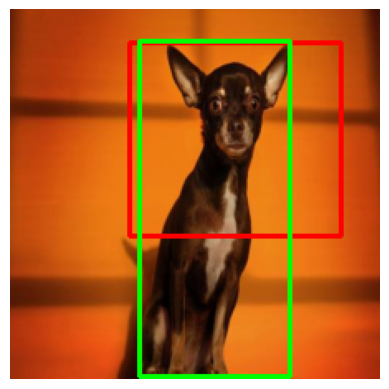

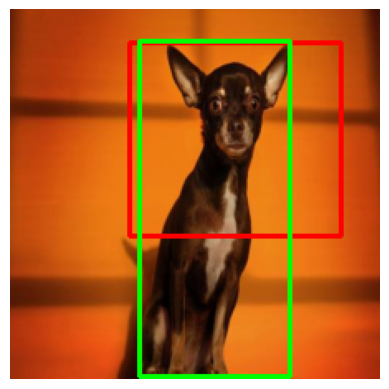

In [126]:
item = train_dataset[10]
image, label, gt_bbox = item
orig_img = unnormalize(image)

# cam
cam = generate_cam(model, item)
cam_resized = cv2.resize(cam, (orig_img.shape[1], orig_img.shape[0]))
bbox_cam = get_bbox(cam_resized, threshold=0.5)

img_cam_gt = visualize_both_bbox_on_image(orig_img, bbox_cam, tuple(map(int, gt_bbox)))
plt.imshow(img_cam_gt)
plt.axis("off")
plt.show()


# grad cam 
grad_cam_l4 = generate_grad_cam(model, "layer4", item)
grad_resized = cv2.resize(grad_cam_l4, (orig_img.shape[1], orig_img.shape[0]))
bbox_grad = get_bbox(grad_resized, threshold=0.5)


img_gcam_gt = visualize_both_bbox_on_image(orig_img, bbox_grad, tuple(map(int, gt_bbox)))
plt.imshow(img_gcam_gt)
plt.axis("off")
plt.show()



In [127]:
def get_iou(bbox1, bbox2):
    """
    bbox: (x_min, y_min, x_max, y_max)
    둘 중 하나라도 None이면 IoU=0
    """
    if bbox1 is None or bbox2 is None:
        return 0.0

    x_min1, y_min1, x_max1, y_max1 = bbox1
    x_min2, y_min2, x_max2, y_max2 = bbox2

    x_min_inter = max(x_min1, x_min2)
    y_min_inter = max(y_min1, y_min2)
    x_max_inter = min(x_max1, x_max2)
    y_max_inter = min(y_max1, y_max2)

    inter_w = max(0, x_max_inter - x_min_inter)
    inter_h = max(0, y_max_inter - y_min_inter)
    inter_area = inter_w * inter_h

    area1 = max(0, x_max1 - x_min1) * max(0, y_max1 - y_min1)
    area2 = max(0, x_max2 - x_min2) * max(0, y_max2 - y_min2)

    union = area1 + area2 - inter_area
    if union <= 0:
        return 0.0

    return inter_area / union


In [132]:
item = train_dataset[114]
image, label, gt_bbox = item
orig_img = unnormalize(image)
gt_bbox = tuple(map(int, gt_bbox))

cam = generate_cam(model, item)
cam_resized = cv2.resize(cam, (orig_img.shape[1], orig_img.shape[0]))
bbox_cam = get_bbox(cam_resized, threshold=0.5)

grad_cam_l4 = generate_grad_cam(model, "layer4", item)
grad_resized = cv2.resize(grad_cam_l4, (orig_img.shape[1], orig_img.shape[0]))
bbox_grad = get_bbox(grad_resized, threshold=0.5)

iou_cam = get_iou(gt_bbox, bbox_cam)
iou_grad = get_iou(gt_bbox, bbox_grad)

print("IoU (CAM vs GT):     ", iou_cam)
print("IoU (Grad-CAM vs GT):", iou_grad)


IoU (CAM vs GT):      0.4687473921388634
IoU (Grad-CAM vs GT): 0.4687473921388634


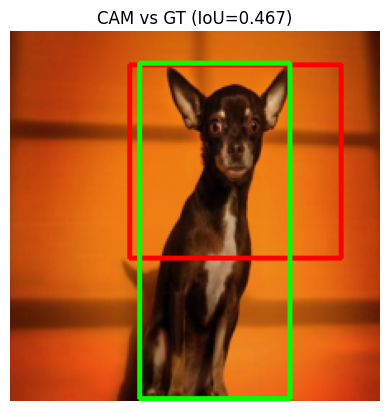

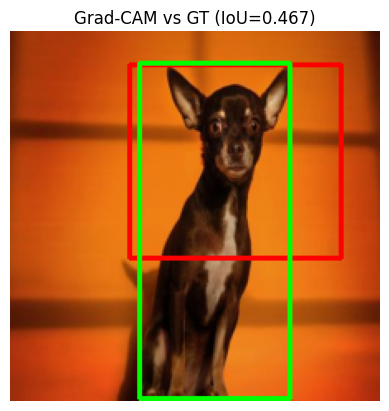

In [133]:
# 1) 샘플 하나 선택
item = train_dataset[10]
image, label, gt_bbox = item
orig_img = unnormalize(image)
gt_bbox = tuple(map(int, gt_bbox))

# 2) CAM
cam = generate_cam(model, item)
cam_resized = cv2.resize(cam, (orig_img.shape[1], orig_img.shape[0]))
bbox_cam = get_bbox(cam_resized, threshold=0.5)
iou_cam = get_iou(gt_bbox, bbox_cam)

img_cam_gt = visualize_both_bbox_on_image(orig_img, bbox_cam, gt_bbox)
plt.imshow(img_cam_gt); plt.title(f"CAM vs GT (IoU={iou_cam:.3f})"); plt.axis("off"); plt.show()

# 3) Grad-CAM (layer4 기준)
grad_cam = generate_grad_cam(model, "layer4", item)
grad_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
bbox_grad = get_bbox(grad_resized, threshold=0.5)
iou_grad = get_iou(gt_bbox, bbox_grad)

img_grad_gt = visualize_both_bbox_on_image(orig_img, bbox_grad, gt_bbox)
plt.imshow(img_grad_gt); plt.title(f"Grad-CAM vs GT (IoU={iou_grad:.3f})"); plt.axis("off"); plt.show()


In [134]:
def evaluate_cam_and_gradcam_iou(model, dataset, device,
                                 cam_threshold=0.5, grad_threshold=0.5,
                                 max_samples=200):
    model.eval()
    n = min(len(dataset), max_samples)

    cam_ious = []
    grad_ious = []

    for idx in range(n):
        item = dataset[idx]
        image, label, gt_bbox = item
        orig_img = unnormalize(image)
        gt_bbox = tuple(map(int, gt_bbox))

        # CAM
        cam = generate_cam(model, item)
        cam_resized = cv2.resize(cam, (orig_img.shape[1], orig_img.shape[0]))
        bbox_cam = get_bbox(cam_resized, threshold=cam_threshold)
        iou_cam = get_iou(gt_bbox, bbox_cam)
        cam_ious.append(iou_cam)

        # Grad-CAM
        grad_cam = generate_grad_cam(model, "layer4", item)
        grad_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
        bbox_grad = get_bbox(grad_resized, threshold=grad_threshold)
        iou_grad = get_iou(gt_bbox, bbox_grad)
        grad_ious.append(iou_grad)

    mean_cam_iou = float(np.mean(cam_ious))
    mean_grad_iou = float(np.mean(grad_ious))

    return mean_cam_iou, mean_grad_iou

# 200개에 대한 iou 평균
mean_cam_iou, mean_grad_iou = evaluate_cam_and_gradcam_iou(
    model, train_dataset, device, cam_threshold=0.5, grad_threshold=0.5, max_samples=200
)

print("Mean IoU (CAM):     ", mean_cam_iou)
print("Mean IoU (Grad-CAM):", mean_grad_iou)


Mean IoU (CAM):      0.4694436145856141
Mean IoU (Grad-CAM): 0.4694436145856141


In [135]:
def evaluate_cam_and_gradcam_iou(model, dataset, device,
                                 cam_threshold=0.5, grad_threshold=0.5,
                                 max_samples=200):
    model.eval()
    n = min(len(dataset), max_samples)

    cam_ious = []
    grad_ious = []

    for idx in range(n):
        item = dataset[idx]
        image, label, gt_bbox = item
        orig_img = unnormalize(image)
        gt_bbox = tuple(map(int, gt_bbox))

        # CAM
        cam = generate_cam(model, item)
        cam_resized = cv2.resize(cam, (orig_img.shape[1], orig_img.shape[0]))
        bbox_cam = get_bbox(cam_resized, threshold=cam_threshold)
        iou_cam = get_iou(gt_bbox, bbox_cam)
        cam_ious.append(iou_cam)

        # Grad-CAM
        grad_cam = generate_grad_cam(model, "layer3", item)
        grad_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
        bbox_grad = get_bbox(grad_resized, threshold=grad_threshold)
        iou_grad = get_iou(gt_bbox, bbox_grad)
        grad_ious.append(iou_grad)

    mean_cam_iou = float(np.mean(cam_ious))
    mean_grad_iou = float(np.mean(grad_ious))

    return mean_cam_iou, mean_grad_iou

# 200개에 대한 iou 평균
mean_cam_iou, mean_grad_iou = evaluate_cam_and_gradcam_iou(
    model, train_dataset, device, cam_threshold=0.5, grad_threshold=0.5, max_samples=200
)

print("Mean IoU (CAM):     ", mean_cam_iou)
print("Mean IoU (Grad-CAM):", mean_grad_iou)


Mean IoU (CAM):      0.4694436145856141
Mean IoU (Grad-CAM): 0.5365535508388359


In [136]:
def evaluate_cam_and_gradcam_iou(model, dataset, device,
                                 cam_threshold=0.5, grad_threshold=0.5,
                                 max_samples=200):
    model.eval()
    n = min(len(dataset), max_samples)

    cam_ious = []
    grad_ious = []

    for idx in range(n):
        item = dataset[idx]
        image, label, gt_bbox = item
        orig_img = unnormalize(image)
        gt_bbox = tuple(map(int, gt_bbox))

        # CAM
        cam = generate_cam(model, item)
        cam_resized = cv2.resize(cam, (orig_img.shape[1], orig_img.shape[0]))
        bbox_cam = get_bbox(cam_resized, threshold=cam_threshold)
        iou_cam = get_iou(gt_bbox, bbox_cam)
        cam_ious.append(iou_cam)

        # Grad-CAM
        grad_cam = generate_grad_cam(model, "layer2", item)
        grad_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
        bbox_grad = get_bbox(grad_resized, threshold=grad_threshold)
        iou_grad = get_iou(gt_bbox, bbox_grad)
        grad_ious.append(iou_grad)

    mean_cam_iou = float(np.mean(cam_ious))
    mean_grad_iou = float(np.mean(grad_ious))

    return mean_cam_iou, mean_grad_iou

# 200개에 대한 iou 평균
mean_cam_iou, mean_grad_iou = evaluate_cam_and_gradcam_iou(
    model, train_dataset, device, cam_threshold=0.5, grad_threshold=0.5, max_samples=200
)

print("Mean IoU (CAM):     ", mean_cam_iou)
print("Mean IoU (Grad-CAM):", mean_grad_iou)


Mean IoU (CAM):      0.4694436145856141
Mean IoU (Grad-CAM): 0.5622602753685925


In [137]:
def evaluate_cam_and_gradcam_iou(model, dataset, device,
                                 cam_threshold=0.5, grad_threshold=0.5,
                                 max_samples=200):
    model.eval()
    n = min(len(dataset), max_samples)

    cam_ious = []
    grad_ious = []

    for idx in range(n):
        item = dataset[idx]
        image, label, gt_bbox = item
        orig_img = unnormalize(image)
        gt_bbox = tuple(map(int, gt_bbox))

        # CAM
        cam = generate_cam(model, item)
        cam_resized = cv2.resize(cam, (orig_img.shape[1], orig_img.shape[0]))
        bbox_cam = get_bbox(cam_resized, threshold=cam_threshold)
        iou_cam = get_iou(gt_bbox, bbox_cam)
        cam_ious.append(iou_cam)

        # Grad-CAM
        grad_cam = generate_grad_cam(model, "layer1", item)
        grad_resized = cv2.resize(grad_cam, (orig_img.shape[1], orig_img.shape[0]))
        bbox_grad = get_bbox(grad_resized, threshold=grad_threshold)
        iou_grad = get_iou(gt_bbox, bbox_grad)
        grad_ious.append(iou_grad)

    mean_cam_iou = float(np.mean(cam_ious))
    mean_grad_iou = float(np.mean(grad_ious))

    return mean_cam_iou, mean_grad_iou

# 200개에 대한 iou 평균
mean_cam_iou, mean_grad_iou = evaluate_cam_and_gradcam_iou(
    model, train_dataset, device, cam_threshold=0.5, grad_threshold=0.5, max_samples=200
)

print("Mean IoU (CAM):     ", mean_cam_iou)
print("Mean IoU (Grad-CAM):", mean_grad_iou)


Mean IoU (CAM):      0.4694436145856141
Mean IoU (Grad-CAM): 0.5519343814770703
